Market segmentation

Consider the data in social_marketing.csv. This was data collected in the course of a market-research study using followers of the Twitter account of a large consumer brand that shall remain nameless---let's call it "NutrientH20" just to have a label. The goal here was for NutrientH20 to understand its social-media audience a little bit better, so that it could hone its messaging a little more sharply.

A bit of background on the data collection: the advertising firm who runs NutrientH20's online-advertising campaigns took a sample of the brand's Twitter followers. They collected every Twitter post ("tweet") by each of those followers over a seven-day period in June 2014. Every post was examined by a human annotator contracted through Amazon's Mechanical Turk service. Each tweet was categorized based on its content using a pre-specified scheme of 36 different categories, each representing a broad area of interest (e.g. politics, sports, family, etc.) Annotators were allowed to classify a post as belonging to more than one category. For example, a hypothetical post such as "I'm really excited to see grandpa go wreck shop in his geriatic soccer league this Sunday!" might be categorized as both "family" and "sports." You get the picture.

Each row of social_marketing.csv represents one user, labeled by a random (anonymous, unique) 9-digit alphanumeric code. Each column represents an interest, which are labeled along the top of the data file. The entries are the number of posts by a given user that fell into the given category. Two interests of note here are "spam" (i.e. unsolicited advertising) and "adult" (posts that are pornographic, salacious, or explicitly sexual). There are a lot of spam and pornography "bots" on Twitter; while these have been filtered out of the data set to some extent, there will certainly be some that slip through. There's also an "uncategorized" label. Annotators were told to use this sparingly, but it's there to capture posts that don't fit at all into any of the listed interest categories. (A lot of annotators may used the "chatter" category for this as well.) Keep in mind as you examine the data that you cannot expect perfect annotations of all posts. Some annotators might have simply been asleep at the wheel some, or even all, of the time! Thus there is some inevitable error and noisiness in the annotation process.

Your task to is analyze this data as you see fit, and to prepare a concise report for NutrientH20 that identifies any interesting market segments that appear to stand out in their social-media audience. You have complete freedom in deciding how to pre-process the data and how to define "market segment." (Is it a group of correlated interests? A cluster? A latent factor? Etc.) Just use the data to come up with some interesting, well-supported insights about the audience, and be clear about what you did.

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

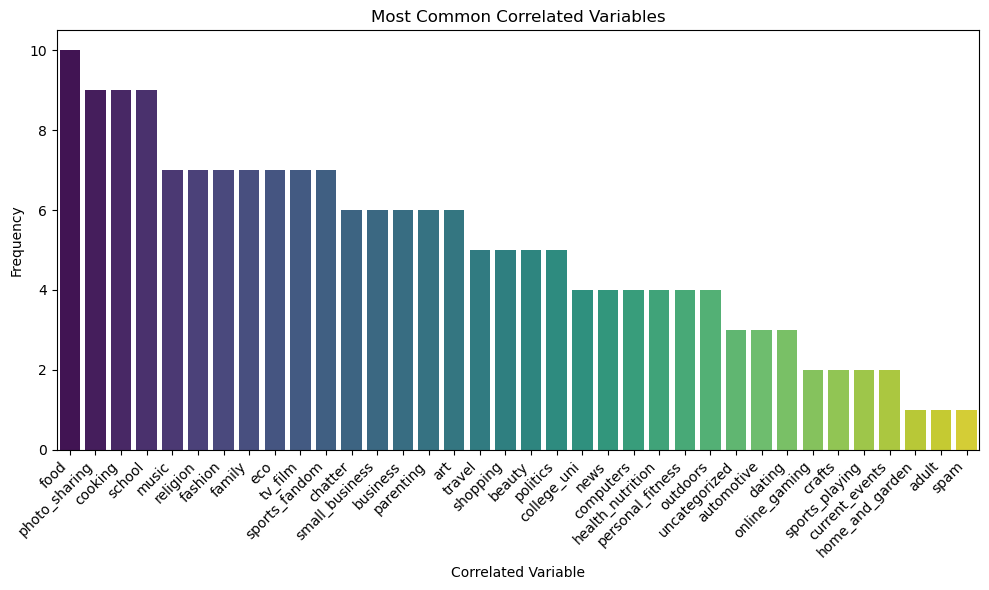

In [11]:
#Calculate Correlation Matrix
correlation_matrix = social[interest_columns].corr()
# Create a dictionary to store correlated variables
correlated_vars = {}

# Explore top correlated variables for each interest
for interest in interest_columns:
    # Exclude self-correlation and get top 5 correlated variables
    top_correlated = correlation_matrix[interest].drop(interest).sort_values(ascending=False)[:5]
    
    # Store correlated variables in dictionary
    correlated_vars[interest] = top_correlated.index.tolist()

# Flatten the list of correlated variables and create a frequency count
correlated_vars_flat = [var for sublist in correlated_vars.values() for var in sublist]
correlation_count = pd.Series(correlated_vars_flat).value_counts()

# Plot the most common correlated variables
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_count.index, y=correlation_count.values, palette="viridis")
plt.xlabel("Correlated Variable")
plt.ylabel("Frequency")
plt.title("Most Common Correlated Variables")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [2]:
social = pd.read_csv("social_marketing.csv")

#Select columns representing interests (excluding user_id)
interest_columns = social.columns[1:]

#Standardize the Data (ensures that each feature contributes equally to the analysis, important when using distances or similarities)
scaler = StandardScaler()
social_scaled = scaler.fit_transform(social[interest_columns])

#Perform KMeans Clustering
num_clusters = 6    #Mess around with different variables here
kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
social["cluster"] = kmeans.fit_predict(social_scaled)

#Group data by cluster and calculate mean interests
cluster_means = social.groupby("cluster")[interest_columns].mean()

#Generate Report
report = "Market Segmentation Analysis for NutrientH20:\n\n"
for cluster_id in range(num_clusters):
    report += f"Cluster {cluster_id + 1}:\n" #Cluster Number
    cluster_interests = cluster_means.loc[cluster_id] #Retrieves mean interests from cluster_means, giving a series containing mean for each column
    top_interests = cluster_interests.sort_values(ascending=False)[:3] #Pulls Top 3 Interests
    report += f"Top Interests: {', '.join(top_interests.index)}\n\n" #Appends Top 3 to report
print(report)

C:\Users\Davis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Market Segmentation Analysis for NutrientH20:

Cluster 1:
Top Interests: health_nutrition, personal_fitness, chatter

Cluster 2:
Top Interests: college_uni, online_gaming, chatter

Cluster 3:
Top Interests: cooking, photo_sharing, fashion

Cluster 4:
Top Interests: politics, travel, news

Cluster 5:
Top Interests: sports_fandom, religion, food

Cluster 6:
Top Interests: chatter, photo_sharing, current_events




C:\Users\Davis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


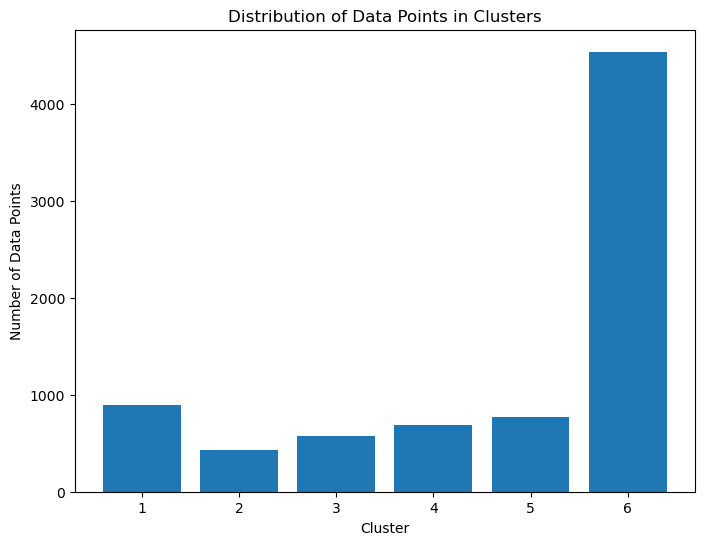

Market Segmentation Analysis for NutrientH20:

Cluster 1:
Top Interests: health_nutrition, personal_fitness, chatter
Number of data points in this cluster: 894

Cluster 2:
Top Interests: college_uni, online_gaming, chatter
Number of data points in this cluster: 430

Cluster 3:
Top Interests: cooking, photo_sharing, fashion
Number of data points in this cluster: 570

Cluster 4:
Top Interests: politics, travel, news
Number of data points in this cluster: 683

Cluster 5:
Top Interests: sports_fandom, religion, food
Number of data points in this cluster: 771

Cluster 6:
Top Interests: chatter, photo_sharing, current_events
Number of data points in this cluster: 4534




In [14]:
# Perform KMeans Clustering
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
social["cluster"] = kmeans.fit_predict(social_scaled)

# Count the number of data points in each cluster
cluster_counts = social["cluster"].value_counts()

# Generate Report
report = "Market Segmentation Analysis for NutrientH20:\n\n"
for cluster_id in range(num_clusters):
    report += f"Cluster {cluster_id + 1}:\n"
    cluster_interests = cluster_means.loc[cluster_id]
    top_interests = cluster_interests.sort_values(ascending=False)[:3]
    report += f"Top Interests: {', '.join(top_interests.index)}\n"
    report += f"Number of data points in this cluster: {cluster_counts[cluster_id]}\n\n"

# Plot the distribution of clusters
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index + 1, cluster_counts.values)
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Data Points in Clusters")
plt.xticks(cluster_counts.index + 1)
plt.show()

print(report)

*This analysis assumes that NutrientH20, although not real, is probably a large brand part of the consumer health goods industry*

Analysis 

Our first graph is a bar graph of a correlation matrix depicting which interests are most frequent in NutrientH20's audience base. Food, photo sharing, and cooking were found to be key interests in their demographic. However NutrientH20 decides to define their market segments, these categories are popular and highly correlated with all other categories, and thus NutrientH20 can push important messages to these categories for maximum effect. 

We also clustered the data into 6 clusters and selected the top 3 categories for each cluster based on meean values and distribution count, which provided the same clusters. According to our clustering of NutrientH20's twitter's following, there are the predictable clusters you'd imagine from a company called NutrientH20, such as health/fitness fans and cooking photo takers. However, there are interesting intersections with college gamers, traveling politics speakers, and religious sports fans. This could be the result of effective advertising by NutrientH20 where they were able to land an audience in these spheres of influence. A graph of the distributions also provides insight about how the company can target their messages. They have a larger proportion of followers liking health_nutrition, personal_fitness, photo_sharing, and current_events and can use this information for marketing strategies and targeted messages. 

It was noteworthy that the clusters we outlined don't rank highly in frequency, suggesting that there isn't much interconnectivity between audience clusters such as the college gaming cluster, religious sports fandom, nor health & fitness cluster. Either way, further targeted advertisements and promotions would be a good way to solidify their influence in these tangential audiences.